<center>UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE</center>
<center>CENTRO DE TECNOLOGIA</center>
<center>DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO</center>
<center>DISCIPLINA DE PROCESSAMENTO DIGITAL DE SINAIS</center>

<b>ALUNO:</b>  Eric Calasans de Barros 

<b>MAT.:  </b>20170155390

<b>PROF.:  </b>Pedro Yochinori Gushiken

<center><h1><b>PROVA - 2ª UNIDADE</b></h1></center>

<h3>Questão 1:</h3>

<h3>a)</h3>

>Sejam os sinais $x_{a}(t) = sen(2 \pi f_{1} t) + sen(2 \pi f_{2} t) + sen(2 \pi f_{3} t)$ e $x_{2}$ tal que:
* $3 sen(2 \pi f_{1} t)$, se $0 \leq t < 1$
* $3 sen(2 \pi f_{2} t)$, se $1 \leq t < 2$
* $3 sen(2 \pi f_{3} t)$, se $2 \leq t < \infty$

>Conforme instruções dadas no escopo da prova, os valores de $f_{1}, f_{2}$ e $f_{3}$ são, respectivamente, para $a = 5, b = 3$ e $c = 9$:

$$f_{1} = a = 5Hz$$

$$f_{2} = 10a + b = 10.5 + 3 = 53Hz$$

$$f_{3} = 100a + 10b + c = 100.5 + 10.3 + 9 = 539Hz$$

>Assim, temos que os seguintes sinais:
$$x_{a}(t) = sen(2 \pi .5 t) + sen(2 \pi .53 t) + sen(2 \pi .539 t) = sen(10 \pi t) + sen(106 \pi t) + sen(1078 \pi t)$$

>E:
>>>* $3 sen(10 \pi t)$, se $0 \leq t < 1$
>>>* $3 sen(106 \pi t)$, se $1 \leq t < 2$
>>>* $3 sen(1078 \pi t)$, se $2 \leq t < \infty$

>Ainda, segundo dados da prova, ambos os sinais foram amostrados a uma frequência de <b>10.000Hz</b> durante <b>3s</b>.  Dessa forma, cada amostra foi obtida a cada <b>$10^{-4}$s</b> e, em tempo discreto, obtemos $x_{1}[n]$:

$$x_{1}[n] = sen(10 \pi n) + sen(106 \pi n) + sen(1078 \pi n)$$ 

> e $x_{2}[n]:$

>>>* $3 sen(10 \pi t)$, se $0 \leq n < 10000 $
>>>* $3 sen(106 \pi t)$, se $10000 \leq n < 20000$
>>>* $3 sen(1078 \pi t)$, se $20000 \leq n < 30000$

>Utilizando a linguagem Python e suas bibliotecas, produzimos as sequências $x_{1}[n]$ e $x_{2}[n]$ conforme demonstrado a seguir:

No handles with labels found to put in legend.


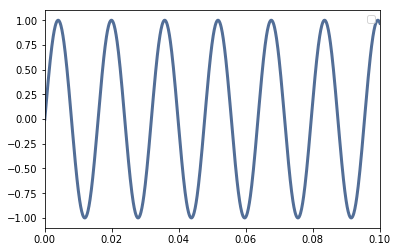

In [8]:
import numpy as np
from ThinkDSP import thinkdsp
from ThinkDSP import thinkplot # Bibliotecas para PDS(https://github.com/AllenDowney/ThinkDSP)
import scipy
import math
import matplotlib.pyplot as plt

%matplotlib inline

DOIS_PI = 2 * math.pi

# Frequências calculadas conforme a matrícula
freq1 = 10 * DOIS_PI
freq2  = 106 * DOIS_PI
freq3 = 1078 * DOIS_PI

# Senóides 
sen1_t = thinkdsp.SinSignal(freq1)
sen2_t = thinkdsp.SinSignal(freq2)
sen3_t = thinkdsp.SinSignal(freq3)

# Sequências x1_n e x2_n
x1_t = sen1_t + sen2_t + sen3_t

x1_n = x1_t.make_wave(duration=3, start=0, framerate=10000)

sen1_n = sen1_t.make_wave(duration=1, start=0, framerate=10000) 
sen2_n = sen2_t.make_wave(duration=1, start=1, framerate=10000)
sen3_n = sen3_t.make_wave(duration=1, start=2, framerate=10000)

x2_n = sen1_n + sen2_n + sen3_n

x2_n.plot()
thinkplot.config(xlim = (0,0.1))
plt.show()

<h3>b)</h3>

>Sejam:

>>* $\Omega_{1} = 2 \pi f_{1} = 10 \pi$
>>* $\Omega_{2} = 2 \pi f_{2} = 106 \pi$
>>* $\Omega_{3} = 2 \pi f_{3} = 1078 \pi$

>Pela tabela de <b>DTFT</b> e considerando $\Omega$ <b>limitado em banda</b>, tal que $|\Omega| < \pi$:
$$X(\Omega) = \frac{\pi}{j} [\delta (\Omega - \Omega_{0}) - \delta (\Omega + \Omega_{0})]$$

>Utilizando a propriedade da **LINEARIDADE**(homogeneidade e superposição) da DTFT:
$$X_{1}(\Omega) = \frac{\pi}{j} \{[\delta (\Omega - \Omega_{1}) - \delta (\Omega + \Omega_{1})] + [\delta (\Omega - \Omega_{2}) - \delta (\Omega + \Omega_{2})] + [\delta (\Omega - \Omega_{3}) - \delta (\Omega + \Omega_{3})]\}$$
$$X_{1}(\Omega) = \frac{\pi}{j} \{[\delta (\Omega - 10 \pi) - \delta (\Omega + 10 \pi)] + [\delta (\Omega - 106 \pi) - \delta (\Omega + 106 \pi)] + [\delta (\Omega - 1078 \pi) - \delta (\Omega + 1078 \pi)]\}$$

>Para $X_{2}(\Omega)$:
>>>* $\frac{\pi}{j} [\delta (\Omega - 106 \pi) - \delta (\Omega + 106 \pi)]$, para $0 \leq n < 10.000$
>>>* $\frac{\pi}{j} [\delta (\Omega - 106 \pi) - \delta (\Omega + 106 \pi)]$, para $10.000 \leq n < 20.000$
>>>* $\frac{\pi}{j} [\delta (\Omega - 1078 \pi) - \delta (\Omega + 1078 \pi)]$, para $20.000 \leq n < 30.000$